# Población mundial (Data cleaning & Data Wrangling)

### Fuente de datos: Kaggle - World population data
#### Autor: Daniel_dot_py
#### Fecha: 19/12/2022


In [1]:
# Importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Extraer datos del csv 

df = pd.read_csv('world_population.csv')

df.head(3)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


In [4]:
# Top 10 Países por población
world_population = df.sort_values(by=['2022 Population'], ascending= False)

world_population.head(10)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60


C:\Users\USER\AppData\Local\Temp\ipykernel_12188\3906201201.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


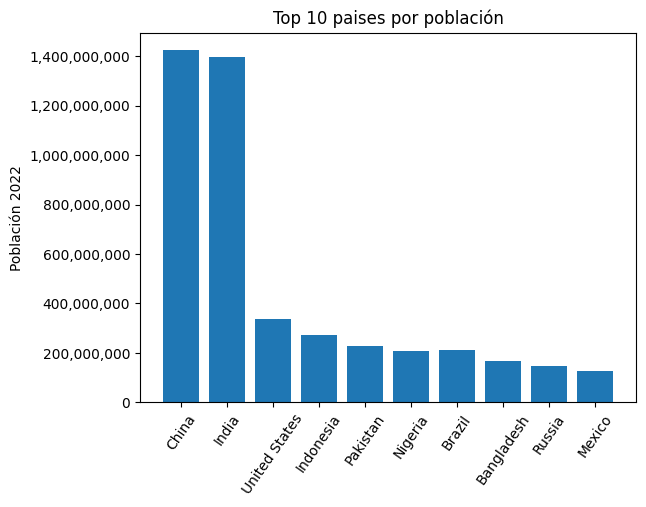

In [13]:
#Graficar el top 10 paises
#filtrar data
top_10 = world_population[world_population['Rank'] <= 10]
paises = list(top_10['Country/Territory'])
poblaciones = list(top_10['2020 Population'])

#crear gráfico
fig, ax = plt.subplots()

ax.bar(paises,poblaciones)

ax.set_ylabel('Población 2022')
ax.set_title('Top 10 paises por población')
ax.tick_params(axis= 'x', rotation = 55)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

plt.show()

In [17]:
# Obtener población por continente 
continentes_df = world_population[['Continent', '2022 Population']].groupby('Continent').sum()
continentes_df = continentes_df.sort_values(by=['2022 Population'], ascending=False)
continentes_df

,2022 Population
Continent,
Asia,4721383274
Africa,1426730932
Europe,743147538
North America,600296136
South America,436816608
Oceania,45038554


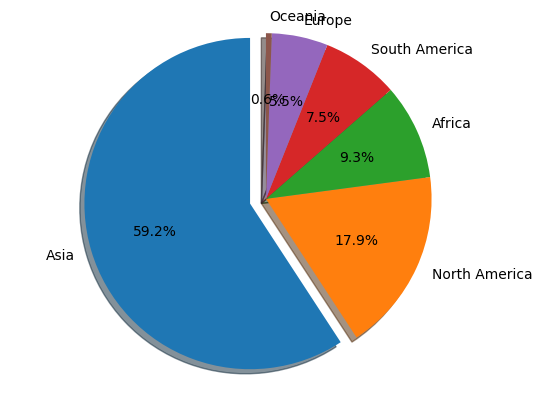

In [26]:
# Gráficando la distribución de población por continentes
#Obteninedo datos
continentes = []
for i in world_population['Continent']:
    if i in continentes:
        pass
    else: 
        continentes.append(i)
poblaciones_cont = list(continentes_df['2022 Population'])
explode = (0.1,0,0,0,0,0)

fig2, ax2 = plt.subplots()

ax2.pie(poblaciones_cont, explode=explode, labels=continentes, autopct='%1.1f%%', shadow= True, startangle=90)
ax2.axis('equal')

plt.show()